## DATASET

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('train_ekmann.csv')
x_train = train['Text']
y_train = train['Emotion']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24685 entries, 0 to 24684
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     24685 non-null  object
 1   Emotion  24684 non-null  object
 2   Id       24684 non-null  object
dtypes: object(3)
memory usage: 578.7+ KB


In [ ]:
train.iloc[:10]

,Text,Emotion,Id
0,My favourite food is anything I didn't have to...,neutral,eebbqej
1,"Now if he does off himself, everyone will thin...",neutral,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,anger,eezlygj
3,To make her feel threatened,fear,ed7ypvh
4,Dirty Southern Wankers,anger,ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,surprise,edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,joy,ee3b6wu
7,We need more boards and to create a bit more s...,joy,ef4qmod
8,Damn youtube and outrage drama is super lucrat...,joy,ed8wbdn
9,It might be linked to the trust factor of your...,neutral,eczgv1o


In [ ]:
val = pd.read_csv('val_ekmann.csv')
x_val = val['Text']
y_val = val['Emotion']

In [ ]:
test = pd.read_csv('test_ekmann.csv')
x_test = test['Text']
y_test = test['Emotion']

## PREPROCESSING

### Labels

In [ ]:
y_train

0         neutral
1         neutral
2           anger
3            fear
4           anger
           ...   
24680    surprise
24681     neutral
24682       anger
24683       anger
24684         NaN
Name: Emotion, Length: 24685, dtype: object

In [ ]:
emotions = list(y_train.unique())
n_classes = len(emotions)
emotions_dict = {e:i for i,e in enumerate(emotions)}
emotions_dict

{'anger': 1,
 'disgust': 6,
 'fear': 2,
 'joy': 4,
 nan: 7,
 'neutral': 0,
 'sadness': 5,
 'surprise': 3}

In [ ]:
y_train = y_train.map(emotions_dict)
y_test = y_test.map(emotions_dict)
y_val = y_val.map(emotions_dict)

In [ ]:
y_train

0        0
1        0
2        1
3        2
4        1
        ..
24680    3
24681    0
24682    1
24683    1
24684    7
Name: Emotion, Length: 24685, dtype: int64

### Texts

In [ ]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
def f(s):
  s = s.lower()
  s = ''.join([c if c.isalnum() else (' ' if c not in ['\'', '’', '-'] else '') for c in s])
  #s = ' '.join([w for w in s.split(' ') if w not in stop_words])  TODO
  return s

In [ ]:
x_train_p = x_train.map(f)
x_test_p = x_test.map(f)
x_val_p = x_val.map(f) 

In [ ]:
x_train_p

0        my favourite food is anything i didnt have to ...
1        now if he does off himself  everyone will thin...
2                           why the fuck is bayless isoing
3                              to make her feel threatened
4                                   dirty southern wankers
                               ...                        
24680    do not destroy your life bc of feelings for an...
24681    head is cold because lack of volume blood flow...
24682                japan shouldnt have attacked the usa 
24683    would breaking her jaw and hands be out of lin...
24684         i think  name  does a great job  cant believ
Name: Text, Length: 24685, dtype: object

In [ ]:
x_train

0        My favourite food is anything I didn't have to...
1        Now if he does off himself, everyone will thin...
2                           WHY THE FUCK IS BAYLESS ISOING
3                              To make her feel threatened
4                                   Dirty Southern Wankers
                               ...                        
24680    Do not destroy your life bc of feelings for an...
24681    Head is cold because lack of volume blood flow...
24682               Japan shouldn't have attacked the USA.
24683    Would breaking her jaw and hands be out of lin...
24684        I think [NAME] does a great job! Can't believ
Name: Text, Length: 24685, dtype: object

## Restrict to the most frequent words

In [ ]:
n_words_restr = 500

In [ ]:
from collections import Counter

In [ ]:
# Each training instance is a list of words
x_train_words = x_train_p.map(lambda s: [w for w in s.split(' ') if w!=''])
x_train_words

0        [my, favourite, food, is, anything, i, didnt, ...
1        [now, if, he, does, off, himself, everyone, wi...
2                    [why, the, fuck, is, bayless, isoing]
3                        [to, make, her, feel, threatened]
4                               [dirty, southern, wankers]
                               ...                        
24680    [do, not, destroy, your, life, bc, of, feeling...
24681    [head, is, cold, because, lack, of, volume, bl...
24682          [japan, shouldnt, have, attacked, the, usa]
24683    [would, breaking, her, jaw, and, hands, be, ou...
24684    [i, think, name, does, a, great, job, cant, be...
Name: Text, Length: 24685, dtype: object

In [ ]:
# Single list containing all the words, possibly repeated, in the train set.
# Basically, it is the train set squized into a single list.
train_list = []
for l in x_train_words:
  train_list += set(l)
print(train_list[:20])

['to', 'is', 'i', 'anything', 'didnt', 'myself', 'have', 'cook', 'my', 'food', 'favourite', 'hes', 'with', 'of', 'now', 'does', 'he', 'laugh', 'will', 'think']


In [ ]:
# Set containing all the different possible words in the training set
words = set([])
for l in x_train_words:
  words.update(set(l))
print(words)

{'deride', 'altering', 'bovine', 'retinas', 'referee', 'central', 'sexrelated', 'puppy', 'prowess', 'ticklish', 'oh', 'mailing', 'att', 'conservative', 'oder', 'clearing', 'eo', 'deputy', 'lightsaber', 'deciding', 'toupee', 'suitcase', 'stop', 'spirit', 'givining', 'tonight', 'simmonds', 'monitor', 'typically', 'mist', 'coconspirators', 'declaring', 'consequences', 'mortar', 'shepherd', 'apparantly', 'gsw', 'class', 'getaway', 'chud', 'casinos', 'underweight', 'sucker', 'republican', 'peed', 'sarcasm', 'komodo', 'skilled', 'moto', 'resection', 'wellwritten', 'dmg', 'bump', 'fact', 'viewed', 'neighbourhood', 'excelsior', 'lo', 'sharks', 'too', 'material', 'wildcard', '8x8', 'salah', 'sandwiches', 'impose', 'pistons', 'tickle', 'mystero', 'biting', 'stauncly', 'trailer', 'legality', 'refrigerate', 'tissue', 'cursive', 'miserably', 'unspeakable', 'ageist', 'measured', 'choke', 'cropped', 'algebra', 'algae', 'flask', 'customs', 'sirens', 'represses', 'resistant', 'bobby', 'pat', 'improperl

In [ ]:
# From set to list
words_list = list(words)

In [ ]:
len(words_list)

20150

In [ ]:
# List containing the count of each word in the training set
counter = Counter(train_list)
counts = [counter[w] for w in words_list]

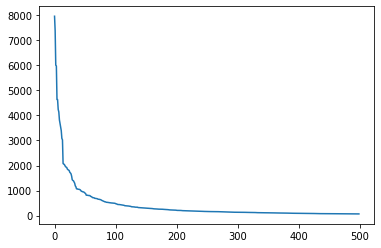

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(sorted(counts)[::-1][:500])

In [ ]:
# Restricting to only the first 500 most frequent words
words_list_restr = [words_list[i] for i in np.argsort(counts)[::-1][:n_words_restr]]
print(words_list_restr)

['the', 'i', 'a', 'to', 'and', 'you', 'is', 'that', 'it', 'of', 'name', 'this', 'in', 'for', 'but', 'was', 'my', 'not', 'just', 'be', 'so', 'on', 'have', 'like', 'its', 'are', 'with', 'im', 'me', 'your', 'they', 'what', 'if', 'dont', 'he', 'at', 'thats', 'about', 'all', 'no', 'as', 'love', 'do', 'one', 'get', 'good', 'would', 'can', 'people', 'out', 'how', 'we', 'an', 'up', 'really', 'think', 'from', 'know', 'or', 'too', 'there', 'when', 'more', 'thanks', 'youre', 'now', 'them', 'she', 'lol', 'his', 'will', 'has', 'time', 'see', 'him', 'her', 'some', 'thank', 'who', 'well', 'because', 'still', 'why', 'much', 'even', 'had', 'go', 'their', 'were', 'only', 'right', 'oh', 'here', 'cant', 'got', 'didnt', 'than', 'been', 'did', 'then', 'by', 'being', 'want', 'way', 'never', 'hope', 'should', 'sorry', 'yeah', 'very', 'make', 'ive', 'man', 'great', 'back', 'better', 'hes', 'feel', 'bad', 'going', 'thing', 'could', 'actually', 'sure', 'also', 'same', 'need', 'doesnt', 'those', 'say', 'any', 'pr

In [ ]:
# Set of all different possible words under consideration.
# We are updating the previously computed set, keeping only the 500 most frequent words
words = set(words_list_restr)

In [ ]:
n_words= len(words)
n_words

500

In [ ]:
# Each instance is a list of words
x_test_words = x_test_p.map(lambda s: [w for w in s.split(' ') if w!=''])
x_val_words = x_val_p.map(lambda s: [w for w in s.split(' ') if w!=''])

In [ ]:
# Keeping only the 500 most frequent words.
# Each instance is a string.
x_train_p = x_train_words.map(lambda l: ' '.join([w for w in l if w in words]))
x_test_p = x_test_words.map(lambda l: ' '.join([w for w in l if w in words]))
x_val_p = x_val_words.map(lambda l: ' '.join([w for w in l if w in words]))

In [ ]:
x_train_p.iloc[1]

'now if he does off everyone will think hes having a with people instead of actually'

In [ ]:
x_train.iloc[1]

'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead'

## Vectorization

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
vectorizer = TextVectorization(standardize='lower_and_strip_punctuation', split='whitespace')

In [ ]:
vectorizer.adapt(x_train_p)

In [ ]:
print(x_train_p.shape)
print(x_train_p[:5])

(24685,)
0           my food is anything i didnt have to myself
1    now if he does off everyone will think hes hav...
2                                      why the fuck is
3                                     to make her feel
4                                                     
Name: Text, dtype: object


In [ ]:
print(vectorizer(x_train_p).shape)
print(vectorizer(x_train_p)[:5])

(24685, 27)
tf.Tensor(
[[ 17 447   8 205   3  98  25   4 355   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [ 71  35  34 174 149 192  72  58 117 277   5  28  46 485  12 123   0   0
    0   0   0   0   0   0   0   0   0]
 [ 84   2 191   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  4 112  67 119   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]], shape=(5, 27), dtype=int64)


$27$ is the maximum number of words in a train sentence

In [ ]:
# New set of all possible words
words = vectorizer.get_vocabulary()
words[:5]

['', '[UNK]', 'the', 'i', 'to']

In [ ]:
# This new set of all possible words is the same as before, wxcept for two additional fake words (one fake word is for the padding)
n_words = len(words)
n_words

502

In [ ]:
# Dictionary, which maps words into the corresponding integers (i.e. indeces) 
word2index = dict((c, i) for i, c in enumerate(words))

# Dictionary, which maps integers/indeces into the corresponding words 
index2word = dict((i, c) for i, c in enumerate(words))

In [ ]:
x_train_integers = vectorizer(x_train_p)

In [ ]:
x_train_integers.shape

TensorShape([24685, 27])

In [ ]:
# We transform also the test
x_test_integers = vectorizer(x_test_p)
x_test_integers.shape

TensorShape([5427, 25])

In [ ]:
# We transform also the test
x_val_integers = vectorizer(x_val_p)
x_val_integers.shape

TensorShape([5426, 26])

## MODEL

In [177]:
import tensorflow as tf
from tensorflow.keras import layers
from keras import regularizers  # Import the regularizers

In [178]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="swish"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [182]:
embedding_dim = 32
num_heads = 3  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

input_layer = layers.Input(shape=(None,))

x = layers.Embedding(n_words, embedding_dim)(input_layer)

transformer_block = TransformerBlock(embedding_dim, num_heads, ff_dim)
x = transformer_block(x)

transformer_block = TransformerBlock(embedding_dim, num_heads, ff_dim)
x = transformer_block(x)

x = layers.GlobalAveragePooling1D()(x)

x = layers.Dense(32, activation='swish')(x)
out = layers.Dense(n_classes)(x)

model = Model([input_layer], out)

In [183]:
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_23 (Embedding)    (None, None, 32)          862688    
                                                                 
 transformer_block_21 (Trans  (None, None, 32)         25312     
 formerBlock)                                                    
                                                                 
 dropout_58 (Dropout)        (None, None, 32)          0         
                                                                 
 transformer_block_22 (Trans  (None, None, 32)         25312     
 formerBlock)                                                    
                                                                 
 global_average_pooling1d_12  (None, 32)               0  

In [184]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [185]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(), metrics='accuracy')

In [128]:
model.fit(x_train_integers, y_train, batch_size=32, epochs=15, validation_data=[x_val_integers, y_val])

Epoch 1/15
1357/1357 [==============================] - 10s 6ms/step - loss: 1.3071 - val_loss: 1.1208
Epoch 2/15
1357/1357 [==============================] - 8s 6ms/step - loss: 0.9820 - val_loss: 1.0876
Epoch 3/15
1357/1357 [==============================] - 8s 6ms/step - loss: 0.8025 - val_loss: 1.2926
Epoch 4/15
1357/1357 [==============================] - 8s 6ms/step - loss: 0.6320 - val_loss: 1.4556
Epoch 5/15
1357/1357 [==============================] - 9s 6ms/step - loss: 0.4982 - val_loss: 1.6905
Epoch 6/15
1357/1357 [==============================] - 9s 7ms/step - loss: 0.4161 - val_loss: 1.9037
Epoch 7/15
1357/1357 [==============================] - 8s 6ms/step - loss: 0.3648 - val_loss: 2.2141
Epoch 8/15
1357/1357 [==============================] - 8s 6ms/step - loss: 0.3277 - val_loss: 2.2566
Epoch 9/15
1357/1357 [==============================] - 9s 6ms/step - loss: 0.2995 - val_loss: 2.5271
Epoch 10/15
1357/1357 [==============================] - 8s 6ms/step - loss: 0.27

In [145]:
import matplotlib.pyplot as plt
def plot_history(training_history, n_epochs=None):
    if not n_epochs:
      n_epochs = len(training_history.history['loss'])

    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

    plt.figure()
    plt.plot(epochs, training_history.history['accuracy'], label='train_accuracy')
    plt.plot(epochs, training_history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Accuracy')

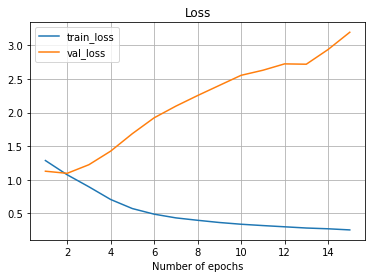

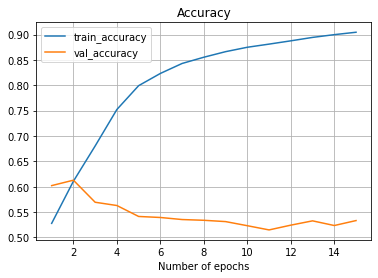

In [187]:
plot_history(hist)

Final score: macro avg f1. Better results than Dense NN.

In [140]:
from sklearn.metrics import classification_report 

y_test_pred = model.predict(x_test_integers)
print(y_test_pred.shape)
y_test_pred = np.argmax(y_test_pred, axis=-1)
print(y_test_pred.shape)

print(classification_report(y_test, y_test_pred))

(5427, 7)
(5427,)
              precision    recall  f1-score   support

           0       0.51      0.46      0.49      1648
           1       0.29      0.38      0.33       572
           2       0.58      0.41      0.48        81
           3       0.33      0.35      0.34       677
           4       0.70      0.65      0.68      1978
           5       0.35      0.46      0.40       355
           6       0.39      0.35      0.37       116

    accuracy                           0.51      5427
   macro avg       0.45      0.44      0.44      5427
weighted avg       0.52      0.51      0.51      5427

